# **Sentiment Prediction on Movie Reviews**

# **Introduction**

This project involves predicting the sentiment of movie reviews (Positive/Negative) using various Classification Machine Learning models such as Logistic Regression, Decision Trees and Multinomial Naive Bayes.

# **Data Understanding**

The movies.csv file contains the metadata on movies. The train.csv file contains the review sentiment and other features & test.csv file has review features but no sentiment column since it is the target.
Here I have merged the movies.csv and train.csv files. 


# **Import Library**

In [90]:
# Linear Algebra
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Interact with the underlying operating system.
import os

# Import RegEx module
import re

# Replace missing values
from sklearn.impute import SimpleImputer 

# Transform features by scaling
from sklearn.preprocessing import MinMaxScaler

# Splitting the data 
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

# Import Pipeline
from sklearn.pipeline import Pipeline

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#Evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix



# **Import Data**

In [91]:
# defining file paths
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [92]:
# loading data

#loading the training data
train_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
#loading the testing data
test_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
# loading the movie data
movie_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')

# **Exploratory Data Analysis**

In [4]:
# View data

train_data.head()  # training data
test_data.head()   # testing data
movie_data.head()  # movie data

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [5]:
# Displaying a concise summary of the data frame

train_data.info()
test_data.info()
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       55315 non-null  object
 1   reviewerName  55315 non-null  object
 2   isTopCritic   55315 non-null  bool  
 3   reviewText    52805 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data column

In [6]:
# Displaying the columns present in the training,test and movie data

train_data.columns
test_data.columns
movie_data.columns

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [7]:
# Displaying the shape of the datasets
train_data.shape
test_data.shape
movie_data.shape

(143258, 14)

In [8]:
# checking for missing values in the data

train_data.isna().sum()
test_data.isna().sum()
movie_data.isna().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

In [9]:
# checking for unique categories in the data

train_data.nunique()
test_data.nunique()
movie_data.nunique()

movieid                 126404
title                   126404
audienceScore              101
rating                      10
ratingContents            8353
releaseDateTheaters      12062
releaseDateStreaming      4726
runtimeMinutes             324
genre                     2912
originalLanguage           112
director                 62208
boxOffice                 4863
distributor               3694
soundType                  551
dtype: int64

**Key Statistics and Relationships in the data**

In [10]:
# Displaying the Summary Statistics of the data

train_data.describe()
test_data.describe()
movie_data.describe()

,audienceScore,runtimeMinutes
count,73248.000000,129431.000000
mean,55.674967,93.708578
std,24.553648,28.129175
min,0.000000,1.000000
25%,37.000000,84.000000
50%,57.000000,92.000000
75%,76.000000,103.000000
max,100.000000,2700.000000


**Inference:** From this table, we can infer that the total runtime duration of the movies was around 2157 hours (129431 minutes) with an average of 93.7 minutes a day.The minimum and maximum audience score was 0 and 100 respectively.The minimum and maximum runtime duration was found to be 1 minute and 45 hours respectively.The average audience score was found to be 55.67.

<Axes: xlabel='sentiment', ylabel='count'>

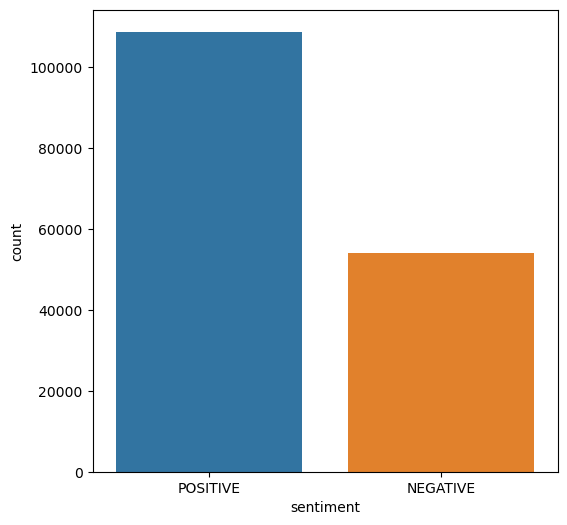

In [11]:
# Analysis of Sentiment

# Creating an empty plot of the given size
figure = plt.figure(figsize=(6,6))
# Displaying the counts of observations in each each categorical bin using bars
sns.countplot(x='sentiment', data= train_data)

Text(0.5, 1.0, 'Sentiment Distribution')

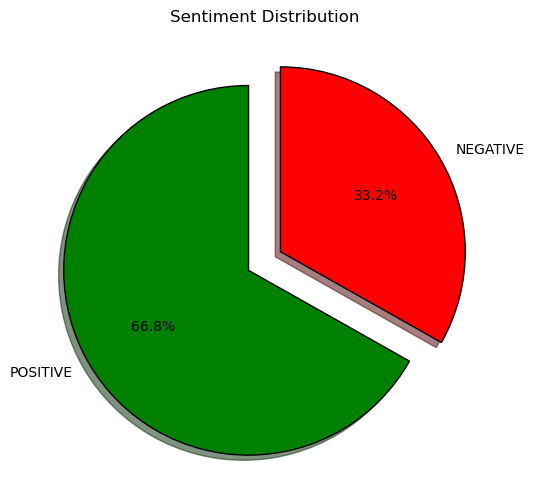

In [12]:
#Pie chart displaying sentiment distribution

# Creating an empty plot of the given size
figure = plt.figure(figsize=(6,6))
# Setting the color, line width and edge color
colors = ('green','red')
wedge_props = {'linewidth':1, 'edgecolor':"black"}
# Finding the count of unique sentiment values
tag = train_data['sentiment'].value_counts()
explode = (0.1,0.1)
tag.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops= wedge_props, explode=explode, label='')
# Setting the title of the pie chart
plt.title('Sentiment Distribution')

**Inference:** Majority of the viewers had a positive review (66.8%).However,around 33.2% of the viewers gave negative reviews.

Text(0.5, 1.0, 'Genre Distribution')

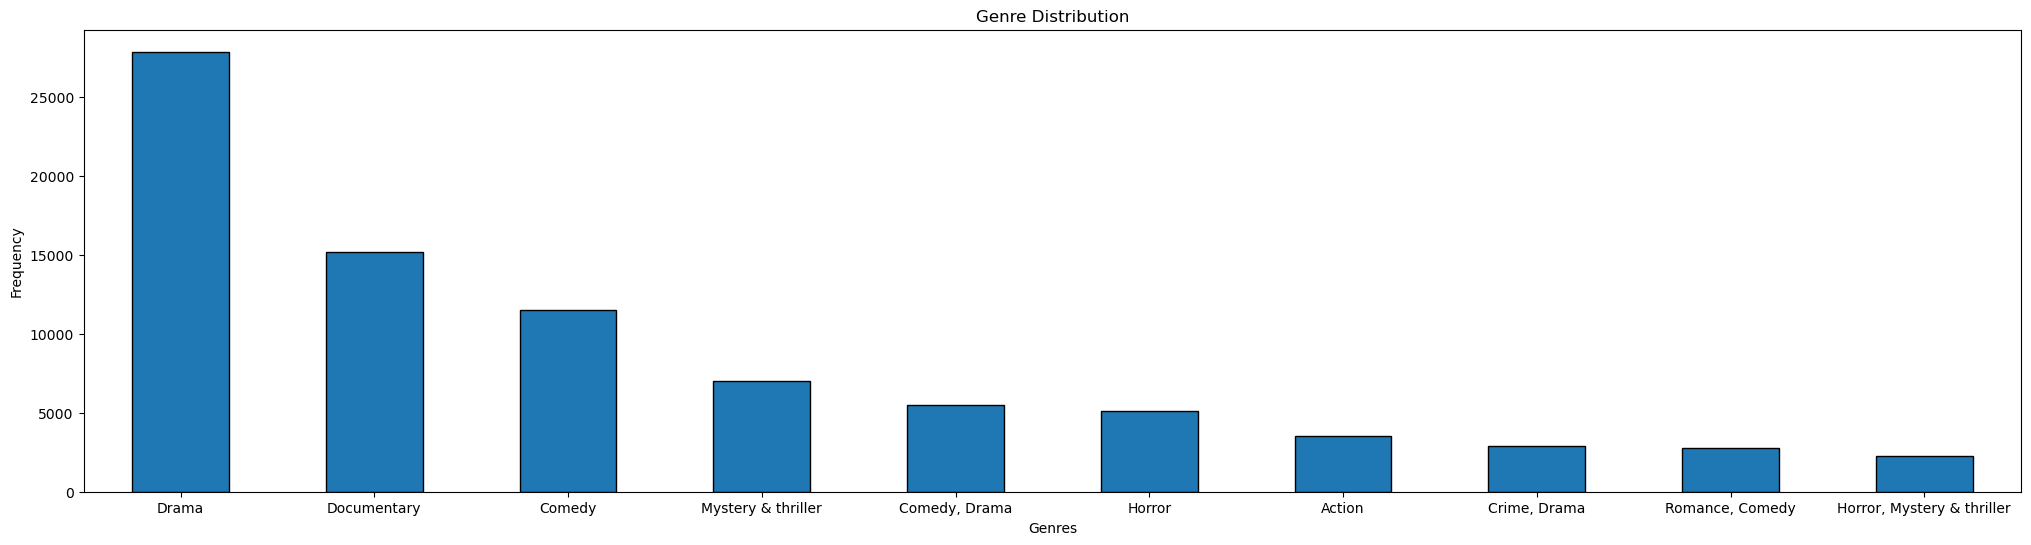

In [15]:
'''#bar chart displaying Genre distribution

# Creating an empty plot of the given size
figure = plt.figure(figsize=(25,6))
#finding Genres with top 10 occurrences
top_10_Genres = (movie_data['genre'].value_counts()).iloc[:10]

#creating a bar chart of movie_data top 10 genres
top_10_Genres.plot(kind='bar', edgecolor='black', rot=0)

#adding axis labels
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Genre Distribution')'''

Text(0.5, 1.0, 'Title Distribution')

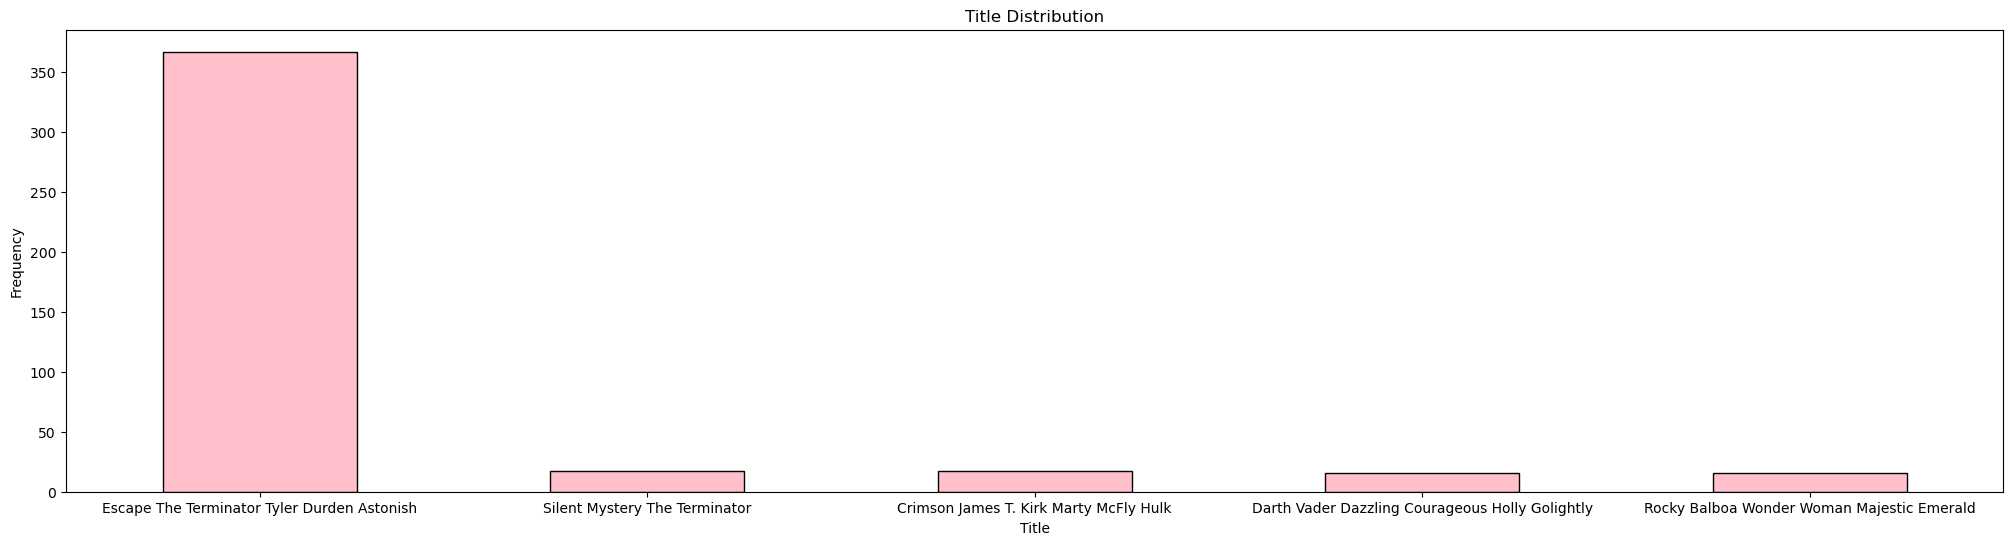

In [16]:
#bar chart displaying Title distribution

#Creating an empty plot of the given size
figure = plt.figure(figsize=(25,6))
#finding Titles with top 10 occurrences
top_10_Titles = (movie_data['title'].value_counts()).iloc[:5]

#creating a bar chart of movie_data top 10 Titles
top_10_Titles.plot(kind='bar', edgecolor='black', rot=0, color='pink')

#adding axis labels
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.title('Title Distribution')

**Inference:** From this we can infer that 'Escape The Terminator Tyler Durden Astonish' is the most popular movie and Drama, Documentary & Comedy are the most popular genres. 

Text(0.5, 1.0, 'Frequent Reviewer Distribution')

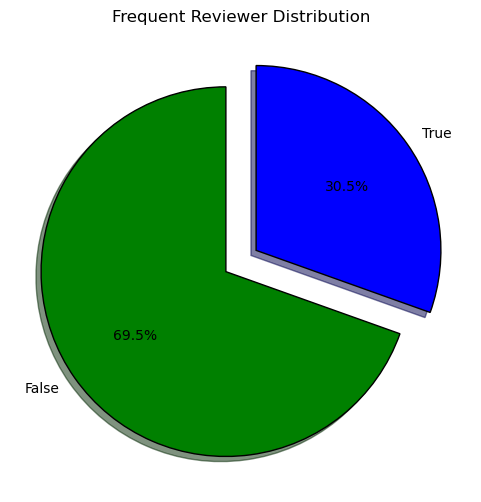

In [17]:
# Pie Chart to check the distribution of frequent and infrequent reviewers

# Creating an empty plot of the given size
figure = plt.figure(figsize=(6,6))
# Setting the color, line width and edge color
colors = ('green','blue')
wedge_props = {'linewidth':1, 'edgecolor':"black"}
# Finding the count of unique isFrequentReviewer values
tag = train_data['isFrequentReviewer'].value_counts()
explode = (0.1,0.1)
tag.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops= wedge_props, explode=explode, label='')
# Setting the title of the pie chart
plt.title('Frequent Reviewer Distribution')

**Inference:** Out of the total 162758 reviewers, 49569 (30.5%) are frequent reviewers

Text(0.5, 1.0, 'Top Critic Distribution')

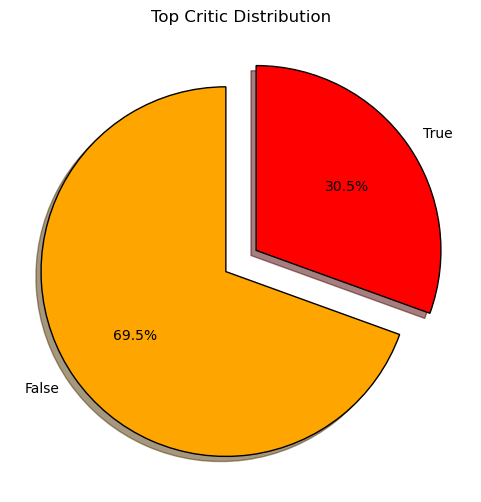

In [18]:
# Creating an empty plot of the given size
figure = plt.figure(figsize=(6,6))
# Setting the color, line width and edge color
colors = ('orange','red')
wedge_props = {'linewidth':1, 'edgecolor':"black"}
# Finding the count of unique top critics values
tag = test_data['isTopCritic'].value_counts()
explode = (0.1,0.1)
tag.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops= wedge_props, explode=explode, label='')
# Setting the title of the pie chart
plt.title('Top Critic Distribution')

**Inference:** Around 16887 (30.5%) reviewers are top critics

# **Feature Engineering**

In [93]:
# Returning DataFrame with duplicate rows removed
movie_data.drop_duplicates(subset=['movieid'], keep='first', inplace=True)
# Displays the shape of the movie dataset
movie_data.shape

(126404, 14)

In [94]:
# Updates the contents of the two dataframes by merging them
data = pd.merge(movie_data, train_data, on="movieid")

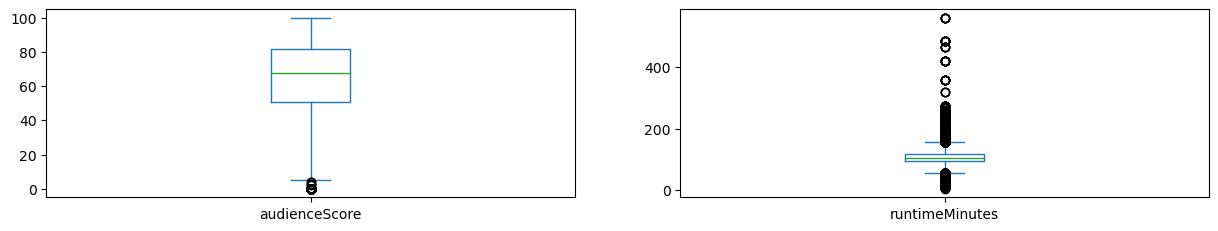

In [95]:
# Checking for Outliers

data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [96]:
# Preprocessing reviewText from data and test_data by removing tags,special characters,spaces,numbers etc
def feature_eng(f):
    pro_features = []
    for line in range(0, len(f)):
        # Removing all tags
        pro_feature = re.sub(r'<.*?>', ' ', str(f[line]))

        #Removing all special characters
        pro_feature = re.sub(r'[^a-zA-Z0-9]', ' ', pro_feature)

        # Substituting multiple spaces with a single space
        pro_feature = re.sub(r'\s+', ' ', pro_feature, flags=re.I)

        # Removing prefixed 'b'
        pro_feature = re.sub(r'^b\s+', '', pro_feature)
        
        # Removing everything that has numbers 
        pro_feature = re.sub(r'\w*\d\w*', '', pro_feature)

        # Converting to Lowercase
        pro_feature = pro_feature.lower()
        
         #removing stop words
        stop_words = ['those', 'on', 'own', 'yourselves', 'ie', 'around', 'between', 'four', 'been', 'alone', 'off', 'am', 'then', 'other', 'can', 'cry', 'hereafter', 'front', 'too', 'wherein', 'everything', 'up', 'onto', 'never', 'either', 'how', 'before', 'anyway', 'since', 'through', 'amount', 'now', 'he', 'cant', 'was', 'con', 'have', 'into', 'because', 'inc', 'not', 'therefore', 'they', 'even', 'whom', 'it', 'see', 'somewhere', 'interest', 'thereupon', 'nothing', 'thick', 'whereas', 'much', 'whenever', 'find', 'seem', 'until', 'whereby', 'at', 'ltd', 'fire', 'also', 'some', 'last', 'than', 'get', 'already', 'our', 'once', 'will', 'noone', 'that', 'what', 'thus', 'no', 'myself', 'out', 'next', 'whatever', 'although', 'though', 'etc', 'which', 'would', 'therein', 'nor', 'somehow', 'whereupon', 'besides', 'whoever', 'thin', 'ourselves', 'few', 'third', 'without', 'anything', 'twelve', 'against', 'while', 'twenty', 'if', 'however', 'found', 'herself', 'when', 'may', 'ours', 'six', 'done', 'seems', 'else', 'call', 'perhaps', 'had', 'nevertheless', 'fill', 'where', 'otherwise', 'still', 'within', 'its', 'for', 'together', 'elsewhere', 'throughout', 'of', 'eg', 'others', 'show', 'sincere', 'anywhere', 'anyhow', 'as', 'are', 'the', 'hence', 'something', 'hereby', 'nowhere', 'de', 'latterly', 'neither', 'his', 'go', 'forty', 'put', 'their', 'by', 'namely', 'could', 'five', 'itself', 'is', 'nine', 'whereafter', 'down', 'bottom', 'thereby', 'such', 'both', 'she', 'become', 'whole', 'who', 'yourself', 'every', 'thru', 'except', 'very', 'several', 'among', 'being', 'be', 'mine', 'further', 'here', 'during', 'why', 'with', 'becomes', 'about', 'a', 'co', 'seeming', 'due', 'wherever', 'beforehand', 'detail', 'fifty', 'becoming', 'might', 'amongst', 'my', 'empty', 'thence', 'thereafter', 'almost', 'least', 'someone', 'often', 'from', 'keep', 'him', 'or', 'top', 'her', 'nobody', 'sometime', 'across', 'hundred', 'only', 'via', 'name', 'eight', 'three', 'back', 'to', 'all', 'became', 'move', 'me', 'we', 'formerly', 'so', 'i', 'whence', 'describe', 'under', 'always', 'himself', 'in', 'herein', 'more', 'after', 'themselves', 'you', 'above', 'sixty', 'them', 'hasnt', 'your', 'made', 'indeed', 'most', 'everywhere', 'fifteen', 'but', 'must', 'along', 'beside', 'hers', 'side', 'former', 'anyone', 'full', 'has', 'yours', 'whose', 'behind', 'please', 'amoungst', 'mill', 'ten', 'seemed', 'sometimes', 'should', 'over', 'take', 'each', 'same', 'rather', 'latter', 'and', 'hereupon', 'part', 'per', 'eleven', 'ever', 'enough', 'again', 'us', 'yet', 'moreover', 'mostly', 'one', 'meanwhile', 'whither', 'there', 'toward', 'give', 'system', 'do', 'an', 'these', 'everyone', 'towards', 'this', 'bill', 'cannot', 'un', 'afterwards', 'beyond', 'were', 'whether', 'well', 'another', 'below', 'first', 'upon', 'any', 'none', 'many', 'serious', 're', 'two', 'couldnt', 'less']
        for i in stop_words:
            for j in pro_feature:
                if i in j:
                    j.replace(i,'')
        
            
          
        
        
        

        pro_features.append(pro_feature)
    return pro_features

In [97]:
# Passing the reviewText of data to the function feature_eng for further preprocessing
data['reviewText'] = feature_eng(data['reviewText'])
# Passing the reviewText of test_data to the function feature_eng for further preprocessing
test_data['reviewText'] = feature_eng(test_data['reviewText'])

**One Hot Encoding**

In [98]:
# Encoding

# Making a list of the categorical columns to encode
categorical_columns = ['genre','originalLanguage']
# Converting categorical variable into dummy/ indicator variables
encoded_data_train = pd.get_dummies(data,columns= categorical_columns)

**Standardization**

In [99]:
# Making a list of the numerical columns to scale and impute

columns = ['audienceScore','runtimeMinutes']
# Using a pipeline to carry out imputation and scaling
pipe = Pipeline(steps=[('imputation',SimpleImputer(strategy='mean')),
                      ('scaling', MinMaxScaler())])

# Fitting and transforming
pipe.fit_transform(data[columns])

array([[0.65      , 0.20825853],
       [0.65      , 0.20825853],
       [0.65      , 0.20825853],
       ...,
       [0.47      , 0.14721724],
       [0.47      , 0.14721724],
       [0.47      , 0.14721724]])

In [100]:
# Assigning X and y
X = data['reviewText'].fillna('?')
y = data['sentiment'].fillna('?')

In [101]:
# Initializing Tfidf Vectorizer
v = TfidfVectorizer()
# Fitting and transforming
X_train_vectorized = v.fit_transform(X)

In [102]:
# Splitting data into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_vectorized, y, train_size=0.8, random_state=42)
X_val

<32552x64144 sparse matrix of type '<class 'numpy.float64'>'
	with 613959 stored elements in Compressed Sparse Row format>

# **Model Building**

# **Multinomial Naive Bayes**

In [103]:
# Defining model
model = MultinomialNB(force_alpha=True)
# Fitting the data
model.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [104]:
# Setting up the Parameters 
alpha_grid = {"alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

# Defining model
mnb = MultinomialNB()

# Defining grid search
model_grid = GridSearchCV(mnb, param_grid=alpha_grid, scoring="f1_macro", n_jobs=-1, cv=5, verbose=5)

# Training model using grid search
model_grid.fit(X_train, y_train)

# Printing the best value of alpha
print("Best parameters:", model_grid.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best parameters: {'alpha': 0.1}


In [105]:
print(model_grid)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]},
             scoring='f1_macro', verbose=5)


In [106]:
# Assigning test for prediction
test = test_data['reviewText'].fillna('?')

In [107]:
# Predicting the label
predictions = model_grid.predict(v.transform(test))

In [108]:
# Displaying the predicted value
print(predictions)

['POSITIVE' 'POSITIVE' 'POSITIVE' ... 'POSITIVE' 'POSITIVE' 'NEGATIVE']


 **Evaluation**

In [109]:
# Evaluation Metrics
y_pred = model_grid.predict(X_val)
# Evaluating the accuracy of the model
print(" The accuracy score is: ", accuracy_score(y_val,y_pred))
# Evaluating the performance of the classification algorithm using confusion_matrix
print("The confusion matrix is: ", confusion_matrix(y_val,y_pred))
# Building a text report showing the main classification metrics
print("The classification report is: ", classification_report(y_val,y_pred))
# automating the prediction of the data using X_val and comparing it with y_val
mnb_score = model_grid.score(X_val,y_val)

 The accuracy score is:  0.7760506266896043
The confusion matrix is:  [[ 5050  5801]
 [ 1489 20212]]
The classification report is:                precision    recall  f1-score   support

    NEGATIVE       0.77      0.47      0.58     10851
    POSITIVE       0.78      0.93      0.85     21701

    accuracy                           0.78     32552
   macro avg       0.77      0.70      0.71     32552
weighted avg       0.78      0.78      0.76     32552



In [110]:
# Printing the confusion matrix 

confusion_matrix = confusion_matrix(y_val, y_pred)

print('Confusion matrix\n\n', confusion_matrix)

print('\nTrue Positives(TP) = ', confusion_matrix[0,0])

print('\nTrue Negatives(TN) = ', confusion_matrix[1,1])

print('\nFalse Positives(FP) = ', confusion_matrix[0,1])

print('\nFalse Negatives(FN) = ', confusion_matrix[1,0])

Confusion matrix

 [[ 5050  5801]
 [ 1489 20212]]

True Positives(TP) =  5050

True Negatives(TN) =  20212

False Positives(FP) =  5801

False Negatives(FN) =  1489


<Axes: >

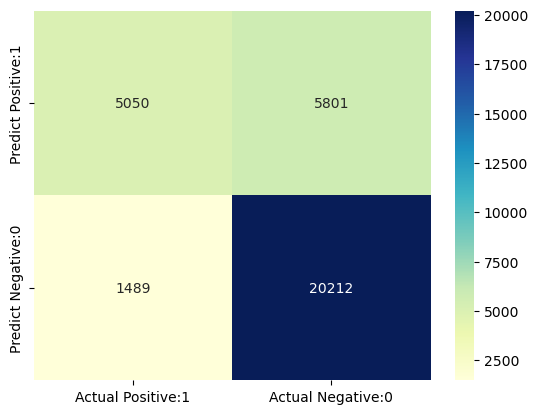

In [111]:
# visualizing the confusion matrix using seaborn heatmap

confusion_matrix_df = pd.DataFrame(data=confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlGnBu')

In [112]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
# Fitting the data and transforming it
y_pred = lab.fit_transform(y_pred)
y_val = lab.fit_transform(y_val)

In [113]:
# Importing roc_curve
from sklearn.metrics import roc_curve
# Visualizing the performance of the binary classifier
mnb_fpr, mnb_tpr, _ = roc_curve(y_val, y_pred)

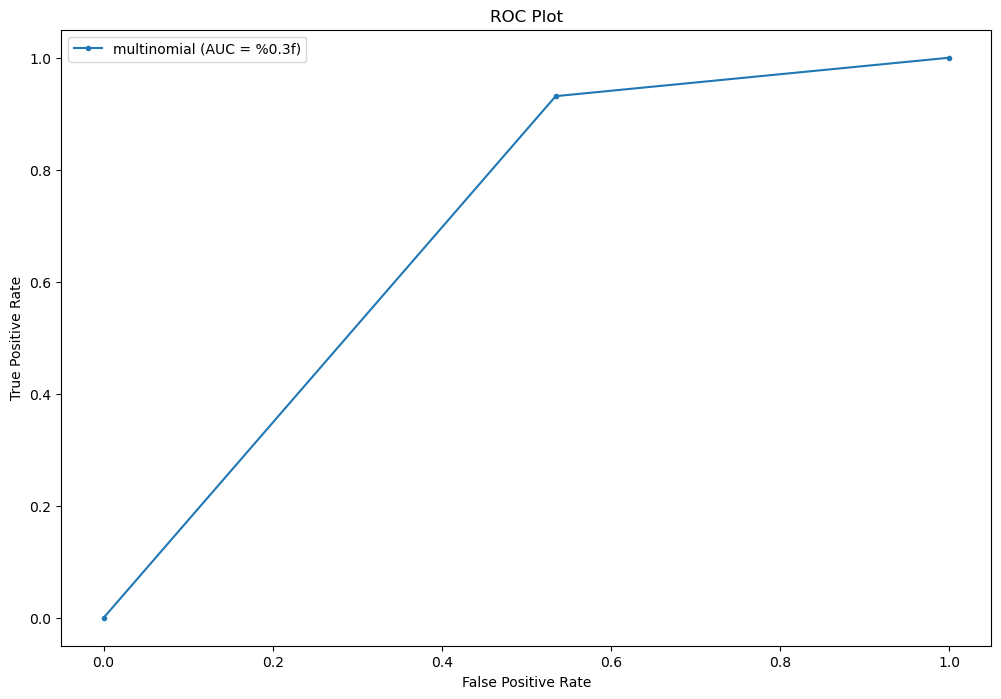

In [114]:
# Importing pyplot from matplotlib
import matplotlib.pyplot as plt
# Creating an empty plot of the given size
plt.figure(figsize=(12, 8))
# Plotting the graph
plt.plot(mnb_fpr, mnb_tpr, marker='.', label='multinomial (AUC = %0.3f)' )



# Specifying title,xlabel,ylabel and legend of the visualization
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

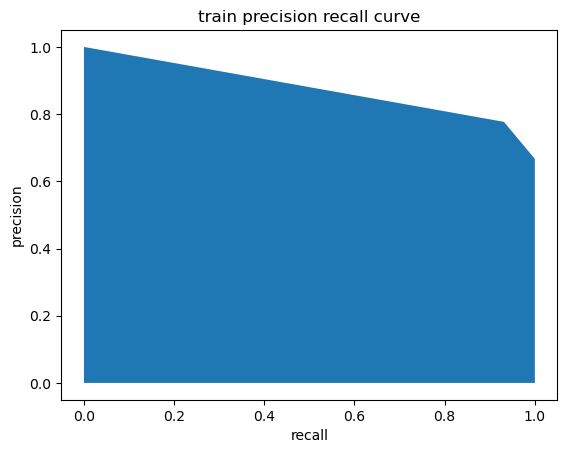

[CV 3/5] END .......................alpha=0.001;, score=0.698 total time=   1.9s
[CV 3/5] END .......................alpha=0.005;, score=0.701 total time=   1.8s
[CV 2/5] END ........................alpha=0.01;, score=0.699 total time=   1.8s
[CV 1/5] END ........................alpha=0.05;, score=0.711 total time=   1.8s
[CV 5/5] END ........................alpha=0.05;, score=0.703 total time=   1.8s
[CV 4/5] END .........................alpha=0.1;, score=0.711 total time=   1.9s
[CV 3/5] END .........................alpha=0.5;, score=0.668 total time=   1.8s
[CV 2/5] END .........................alpha=1.0;, score=0.598 total time=   1.8s
[CV 4/5] END .......................alpha=0.001;, score=0.702 total time=   1.9s
[CV 2/5] END .......................alpha=0.005;, score=0.697 total time=   1.8s
[CV 1/5] END ........................alpha=0.01;, score=0.705 total time=   1.8s
[CV 5/5] END ........................alpha=0.01;, score=0.698 total time=   1.8s
[CV 4/5] END ...............

In [115]:
# Importing precision_recall_curve, f1_score and auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# Plotting the precision against the recall for a single classifier at a variety of thresholds
mnb_precision, mnb_recall, _ = precision_recall_curve(y_val, y_pred)
# Filling area between two horizontal curves
plt.fill_between(mnb_recall,mnb_precision)
# Specifying title,xlabel and ylabel of the visualization
plt.ylabel("precision")
plt.xlabel("recall")
plt.title("train precision recall curve");

# **Logistic Regression**

In [75]:
'''# Defining model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
# Fitting the data
lr_model.fit(X_train, y_train)'''

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
'''# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
# Defining model
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
dist = dict(C = np.arange(0, 1, 0.01),penalty=['l2', 'l1'])
# Defining grid search
classifier = RandomizedSearchCV(lr, dist, random_state=0)
# Training model using RandomizedSearchCV
lr_tuned = classifier.fit(X_train,y_train)
# Printing the best value of alpha
lr_tuned.best_params_'''

{'penalty': 'l2', 'C': 0.91}

In [77]:
#print(lr_tuned)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=0,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'penalty': ['l2', 'l1']},
                   random_state=0)


In [78]:
'''# Assigning test for prediction
test = test_data['reviewText'].fillna('?')'''

In [79]:
'''# Predicting the label
predictions = lr_tuned.predict(v.transform(test))'''

In [80]:
'''# Displaying the predicted value
print(predictions)'''

['POSITIVE' 'POSITIVE' 'POSITIVE' ... 'POSITIVE' 'POSITIVE' 'NEGATIVE']


**Evaluation**

In [81]:
'''# Evaluation Metrics
y_pred = lr_tuned.predict(X_val)
# Evaluating the accuracy of the model
print(" The accuracy score is: ", accuracy_score(y_val,y_pred))
# Evaluating the performance of the classification algorithm using confusion_matrix
print("The confusion matrix is: ", confusion_matrix(y_val,y_pred))
# Building a text report showing the main classification metrics
print("The classification report is: ", classification_report(y_val,y_pred))
# automating the prediction of the data using X_val and comparing it with y_val
lr_score = lr_tuned.score(X_val,y_val)'''

 The accuracy score is:  0.7978618825264193
The confusion matrix is:  [[ 6075  4776]
 [ 1804 19897]]
The classification report is:                precision    recall  f1-score   support

    NEGATIVE       0.77      0.56      0.65     10851
    POSITIVE       0.81      0.92      0.86     21701

    accuracy                           0.80     32552
   macro avg       0.79      0.74      0.75     32552
weighted avg       0.79      0.80      0.79     32552



In [82]:
'''# Printing the confusion matrix



confusion_matrix = confusion_matrix(y_val, y_pred)

print('Confusion matrix\n\n', confusion_matrix)

print('\nTrue Positives(TP) = ', confusion_matrix[0,0])

print('\nTrue Negatives(TN) = ', confusion_matrix[1,1])

print('\nFalse Positives(FP) = ', confusion_matrix[0,1])

print('\nFalse Negatives(FN) = ', confusion_matrix[1,0])'''

Confusion matrix

 [[ 6075  4776]
 [ 1804 19897]]

True Positives(TP) =  6075

True Negatives(TN) =  19897

False Positives(FP) =  4776

False Negatives(FN) =  1804


<Axes: >

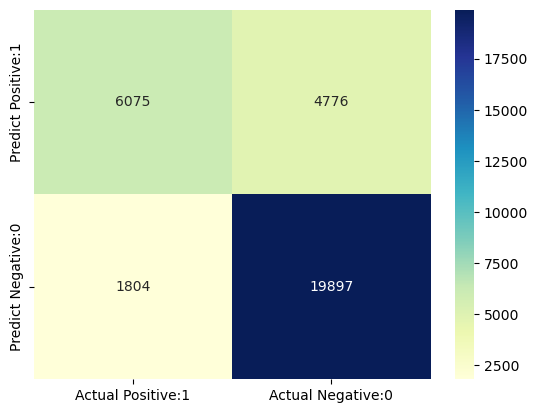

In [83]:
'''# visualizing the confusion matrix using seaborn heatmap

confusion_matrix_df = pd.DataFrame(data=confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlGnBu')'''

In [85]:
'''# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
# Fitting the data and transforming it
y_pred = lab.fit_transform(y_pred)
y_val = lab.fit_transform(y_val)'''

In [86]:
'''# Importing roc_curve
from sklearn.metrics import roc_curve
# Visualizing the performance of the binary classifier
lr_fpr, lr_tpr, _ = roc_curve(y_val, y_pred)'''

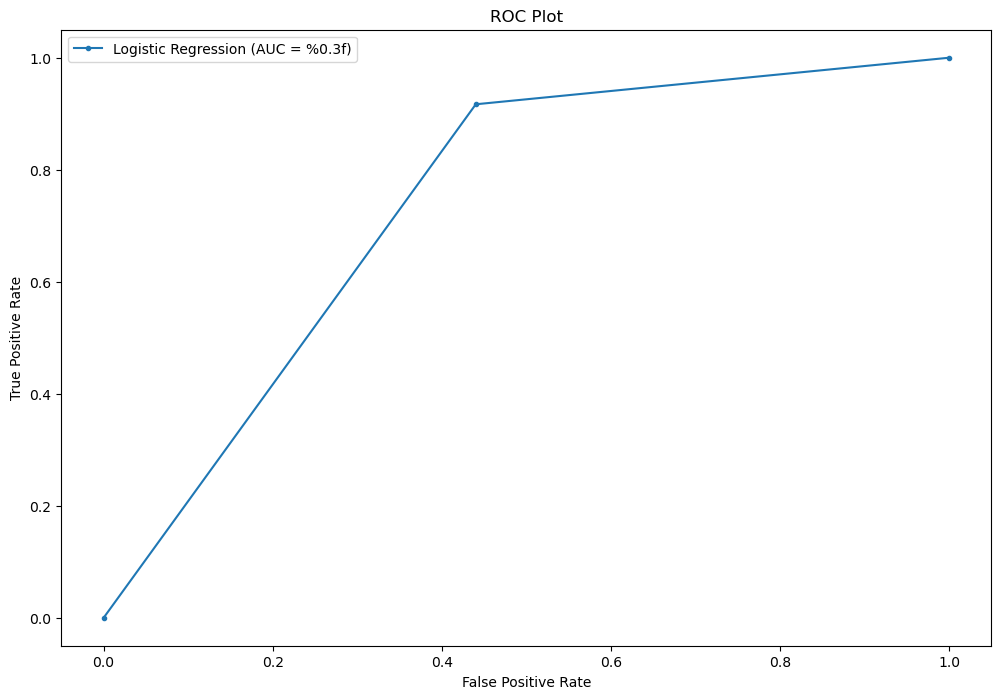

In [87]:
'''# Importing pyplot from matplotlib
import matplotlib.pyplot as plt
# Creating an empty plot of the given size
plt.figure(figsize=(12, 8))
# Plotting the graph
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUC = %0.3f)' )


# Specifying title,xlabel,ylabel and legend of the visualization
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()'''

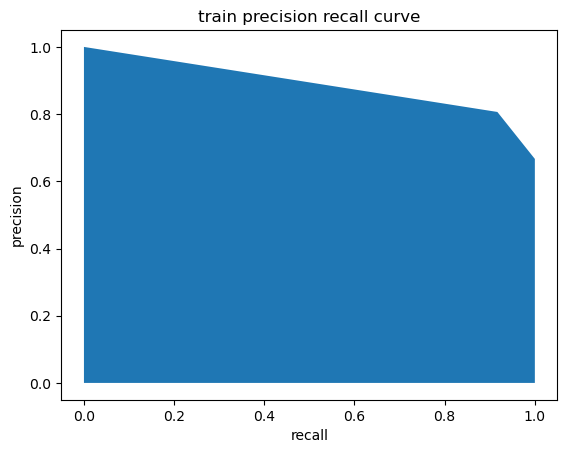

In [88]:
'''# Importing precision_recall_curve, f1_score and auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# Plotting the precision against the recall for a single classifier at a variety of thresholds
lr_precision, lr_recall, _ = precision_recall_curve(y_val, y_pred)
# Filling area between two horizontal curves
plt.fill_between(lr_recall,lr_precision)
# Specifying title, xlabel and ylabel of the visualization
plt.ylabel("precision")
plt.xlabel("recall")
plt.title("train precision recall curve");'''

# **Decision Tree Classifier**

In [30]:
'''# Defining Model
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
# Fitting the model
model_dtc.fit(X_train,y_train)'''

DecisionTreeClassifier()

In [31]:
'''# Defining model
dt_tree = DecisionTreeClassifier(random_state=42)
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV
# Setting up the parameters
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}'''

In [33]:
'''# Defining grid search
grid_search = GridSearchCV(estimator=dt_tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")'''

In [34]:
'''# Training model using grid search
grid_search.fit(X_train, y_train)
grid_search.best_estimator_'''

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, random_state=42)

In [36]:
'''# Assigning test for prediction
test = test_data['reviewText'].fillna('?')'''

In [37]:
'''# Predicting the label
predictions = grid_search.predict(v.transform(test))'''

In [38]:
'''# Displaying the predicted value
print(predictions)'''

['POSITIVE' 'POSITIVE' 'POSITIVE' ... 'POSITIVE' 'POSITIVE' 'POSITIVE']


**Evaluation**

In [40]:
'''# Evaluation Metrics
y_pred = grid_search.predict(X_val)
# Evaluating the accuracy of the model
print(" The accuracy score is: ", accuracy_score(y_val,y_pred))
# Evaluating the performance of the classification algorithm using confusion_matrix
print("The confusion matrix is: ", confusion_matrix(y_val,y_pred))
# Building a text report showing the main classification metrics
print("The classification report is: ", classification_report(y_val,y_pred))
# automating the prediction of the data using X_val and comparing it with y_val
dt_score = grid_search.score(X_val,y_val)'''

 The accuracy score is:  0.6917854509707545
The confusion matrix is:  [[ 1722  9129]
 [  904 20797]]
The classification report is:                precision    recall  f1-score   support

    NEGATIVE       0.66      0.16      0.26     10851
    POSITIVE       0.69      0.96      0.81     21701

    accuracy                           0.69     32552
   macro avg       0.68      0.56      0.53     32552
weighted avg       0.68      0.69      0.62     32552



In [41]:
'''# Printing the confusion matrix



confusion_matrix = confusion_matrix(y_val, y_pred)

print('Confusion matrix\n\n', confusion_matrix)

print('\nTrue Positives(TP) = ', confusion_matrix[0,0])

print('\nTrue Negatives(TN) = ', confusion_matrix[1,1])

print('\nFalse Positives(FP) = ', confusion_matrix[0,1])

print('\nFalse Negatives(FN) = ', confusion_matrix[1,0])'''

Confusion matrix

 [[ 1722  9129]
 [  904 20797]]

True Positives(TP) =  1722

True Negatives(TN) =  20797

False Positives(FP) =  9129

False Negatives(FN) =  904


<Axes: >

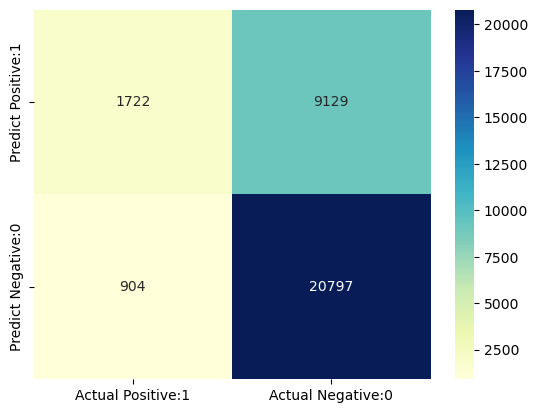

In [42]:
'''# visualizing the confusion matrix using seaborn heatmap

confusion_matrix_df = pd.DataFrame(data=confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlGnBu')'''

In [45]:
'''# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
# Fitting the data and transforming it
y_pred = lab.fit_transform(y_pred)
y_val = lab.fit_transform(y_val)'''

In [48]:
'''# Importing roc_curve
from sklearn.metrics import roc_curve
# Visualizing the performance of the binary classifier
dt_fpr, dt_tpr, _ = roc_curve(y_val, y_pred)'''

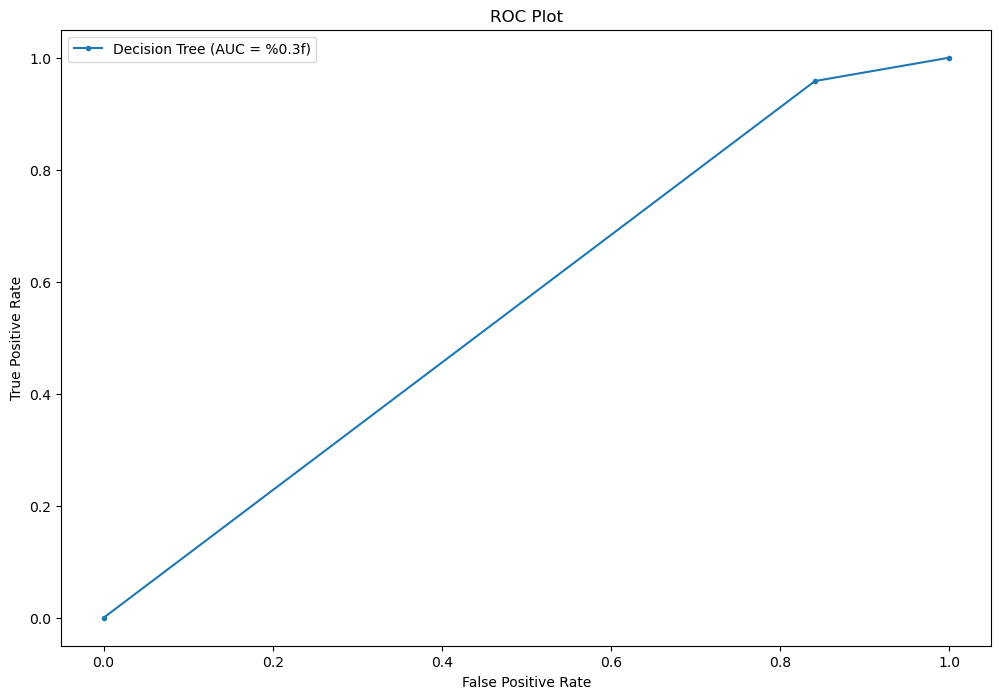

In [50]:
'''# Importing pyplot from matplotlib
import matplotlib.pyplot as plt
# Creating an empty plot of the given size
plt.figure(figsize=(12, 8))
# Plotting the graph
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUC = %0.3f)' )


# Specifying title,xlabel,ylabel and legend of the visualization
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()'''

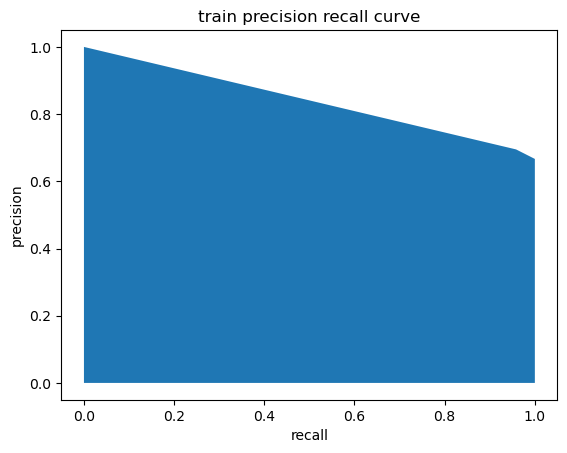

In [52]:
'''# Importing precision_recall_curve, f1_score and auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# Plotting the precision against the recall for a single classifier at a variety of thresholds
dt_precision, dt_recall, _ = precision_recall_curve(y_val, y_pred)
# Filling area between two horizontal curves
plt.fill_between(dt_recall,dt_precision)
# Specifying title,xlabel and ylabel of the visualization
plt.ylabel("precision")
plt.xlabel("recall")
plt.title("train precision recall curve");'''

# **Comparison Between Various Models**

| Classifier | Precision | Recall | f1-score | Accuracy | 
| ---------- | --------- | ------ | -------- | -------- |
| Logistic Regression | 0.79 | 0.80 | 0.79 | 0.79 |
| Multinomial Naive Bayes | 0.78 | 0.78 | 0.76 | 0.77 |
| Decision Tree Classifier | 0.68 | 0.69 | 0.62 | 0.69 |


**In this analysis, three classification models( Logistic Regression, Multinomial Naive Bayes and Decision Tree Classifier) have been considered to predict the sentiment of movie reviews. The highest accuracy (0.79), precision (0.79) and recall (0.80) was obtained in the logistic regression model. Multinomial Naive Bayes appears to be the second best with an accuracy of 0.77. We can conclude that Logistic Regression is the best prediction model for the above problem.**

#  **Submission**

In [29]:
# Submitting the file

def submit(predictions):
    pred_df = pd.DataFrame(predictions)
    pred_df.columns = ['sentiment']
    pred_df.index.name="id"
    pred_df.to_csv("submission.csv")

In [30]:
submit(predictions)

It is found that logistic regression performs better compared to the other models for this dataset